In [1]:
import imageio.v2 as imageio
import os

from skimage import filters
from skimage.exposure import rescale_intensity
from skimage.transform import resize

import numpy as np

import matplotlib.pyplot as plt

/home/rzimmerdev/anaconda3/envs/data/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def normalize_image(image: np.ndarray, cap: float = 255) -> np.ndarray:
    """Normalizes image in Numpy 2D array format, between ranges 0-cap, as to fit uint8 type.

    Args:
        image: 2D numpy array representing image as matrix, with values in any range
        cap: Maximum cap amount for normalization
    Returns:
        return 2D numpy array of type uint8, corresponding to limited range matrix
    """
    normalized = (image - np.min(image, axis=2)) / (np.max(image) - np.min(image)) * cap
    return normalized.astype(np.uint8)

[0]
Img: image_part_003.jpg


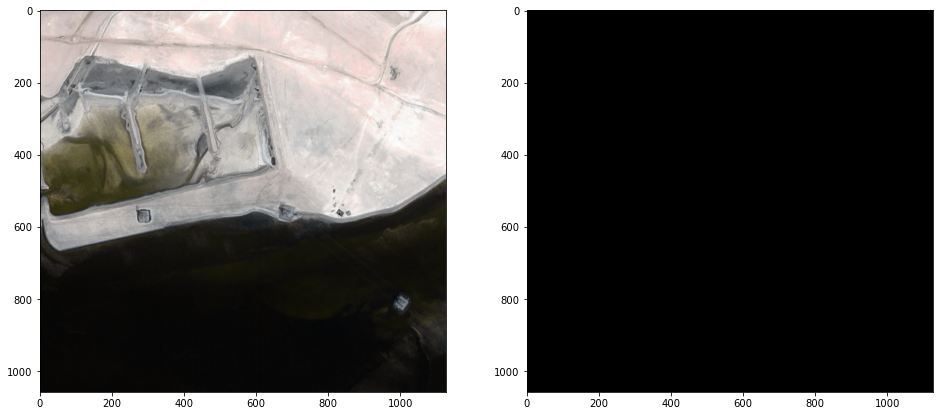

[0 1]
Img: image_part_001.jpg


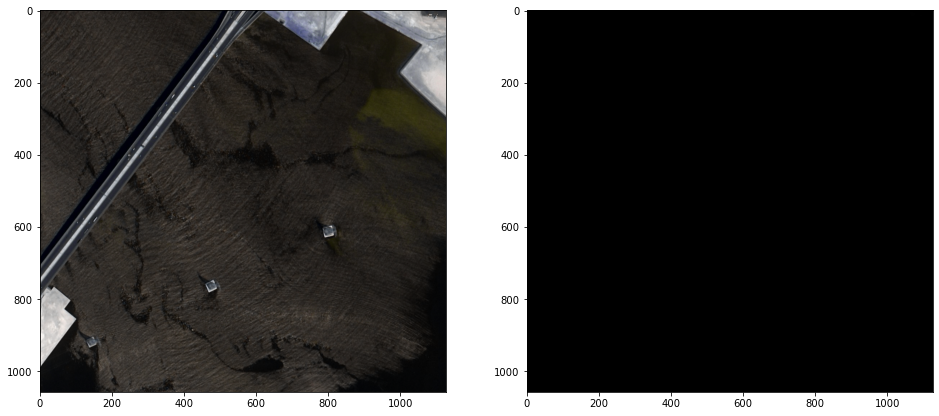

[0 1]
Img: image_part_007.jpg


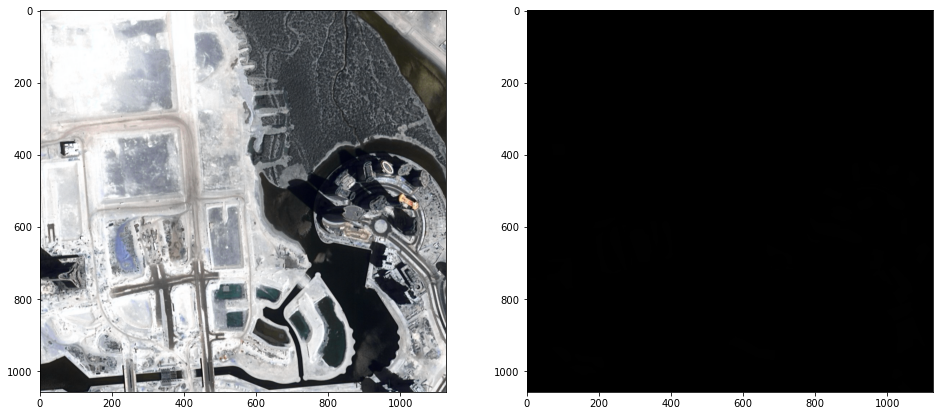

[0 1]
Img: image_part_004.jpg


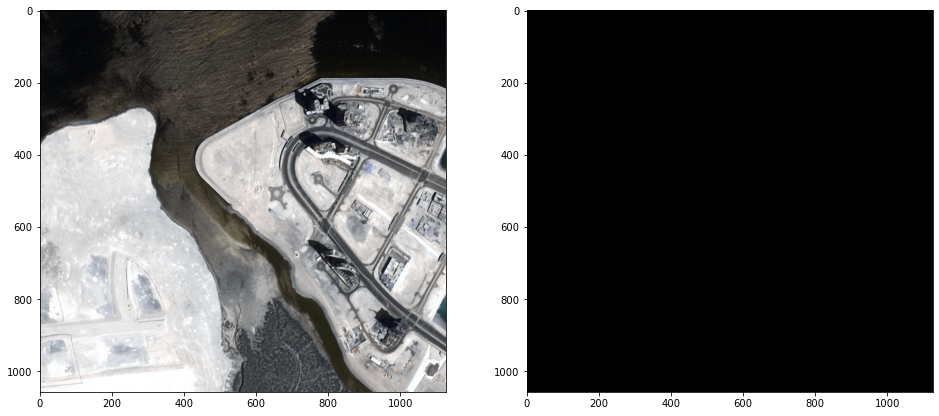

In [5]:
original_images = "data/original/"
processed_images = "data/processed/"

i = 0
total = 3

for tile in os.listdir(original_images):
    current_tile = original_images + f"/{tile}/"
    processed_tile = processed_images + f"/{tile}/"

    for image_uri in os.listdir(current_tile + "images"):
        img = imageio.imread(current_tile + "images/" + image_uri)
        denoised = filters.median(img)
        contrast_enhanced = rescale_intensity(denoised)
        mask = imageio.imread(current_tile + "masks/" + image_uri.replace("jpg", "png"))[:, :, 0:3]
        empty = np.zeros_like(mask)
        empty[mask[:, :] == [60, 16, 152]] = 1

        plt.figure(figsize=(16, 16))
        plt.subplot(121)
        plt.imshow(contrast_enhanced)
        plt.subplot(122)
        plt.imshow(empty)
        print(np.unique(empty))
        print(f"Img: {image_uri}")
        plt.show()

        i += 1

        if i > total:
            break

    if i > total:
            break

In [7]:
def float_to_int(image):
    image = image * 255
    return image.astype(np.uint8)

In [26]:
original_images = "data/original/"
processed_images = "data/processed/"
for tile in os.listdir(original_images):
    current_tile = original_images + f"/{tile}/"
    processed_tile = processed_images + f"/{tile}/"

    for image_uri in os.listdir(current_tile + "images"):
        img = imageio.imread(current_tile + "images/" + image_uri)
        denoised = filters.median(img)
        contrast_enhanced = rescale_intensity(denoised)
        mask = imageio.imread(current_tile + "masks/" + image_uri.replace("jpg", "png"))[:, :, 0:3]
        empty = np.zeros((mask.shape[0], mask.shape[1]))
        empty[(mask[:, :] == [60, 16, 152])[:, :, 0]] = 255
        contrast_enhanced = float_to_int(resize(contrast_enhanced, (256, 256)))
        empty = resize(empty, (256, 256)).astype(np.uint8)

        imageio.imsave(processed_tile + "images/" + image_uri, contrast_enhanced)
        imageio.imsave(processed_tile + "masks/" + image_uri.replace("jpg", "png"), empty)